In [4]:
import numpy as np
import matplotlib.pyplot as plt

from hmc import hmc_1d
from distributions import GaussianMixture1d

In [8]:
# 3 modes example
mu = [0, 3,  8]  
std = [1,1 ,1] 
target_distribution = GaussianMixture1d(mu, std)

initial_state = 0.0
samples, trace_x_all, trace_v_all, accept_or_not = hmc_1d(target_distribution, initial_state, iterations=100000, step_size=0.1, n_steps=10)


Current iteration: 0
Current iteration: 1000
Current iteration: 2000
Current iteration: 3000
Current iteration: 4000
Current iteration: 5000
Current iteration: 6000
Current iteration: 7000
Current iteration: 8000
Current iteration: 9000
Current iteration: 10000
Current iteration: 11000
Current iteration: 12000
Current iteration: 13000
Current iteration: 14000
Current iteration: 15000
Current iteration: 16000
Current iteration: 17000
Current iteration: 18000
Current iteration: 19000
Current iteration: 20000
Current iteration: 21000
Current iteration: 22000
Current iteration: 23000
Current iteration: 24000
Current iteration: 25000
Current iteration: 26000
Current iteration: 27000
Current iteration: 28000
Current iteration: 29000
Current iteration: 30000
Current iteration: 31000
Current iteration: 32000
Current iteration: 33000
Current iteration: 34000
Current iteration: 35000
Current iteration: 36000
Current iteration: 37000
Current iteration: 38000
Current iteration: 39000
Current itera

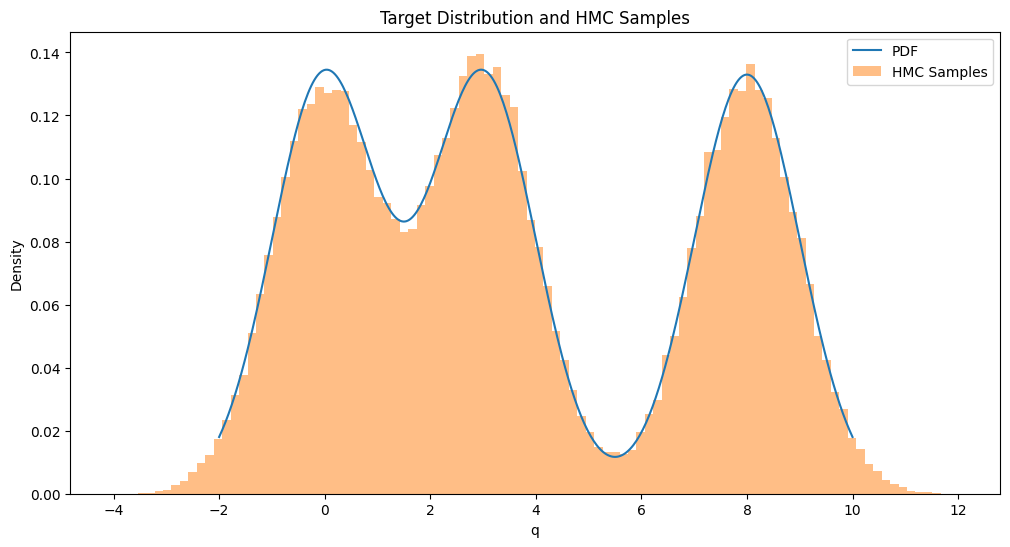

In [9]:
x_values = np.linspace(-2, 10, 400)
pdf_values = np.vectorize(target_distribution.pdf)(x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, pdf_values, label='PDF')
plt.hist(samples, bins=100, density=True, alpha=0.5, label='HMC Samples')
plt.legend()
plt.title('Target Distribution and HMC Samples')
plt.xlabel('q')
plt.ylabel('Density')
plt.show()


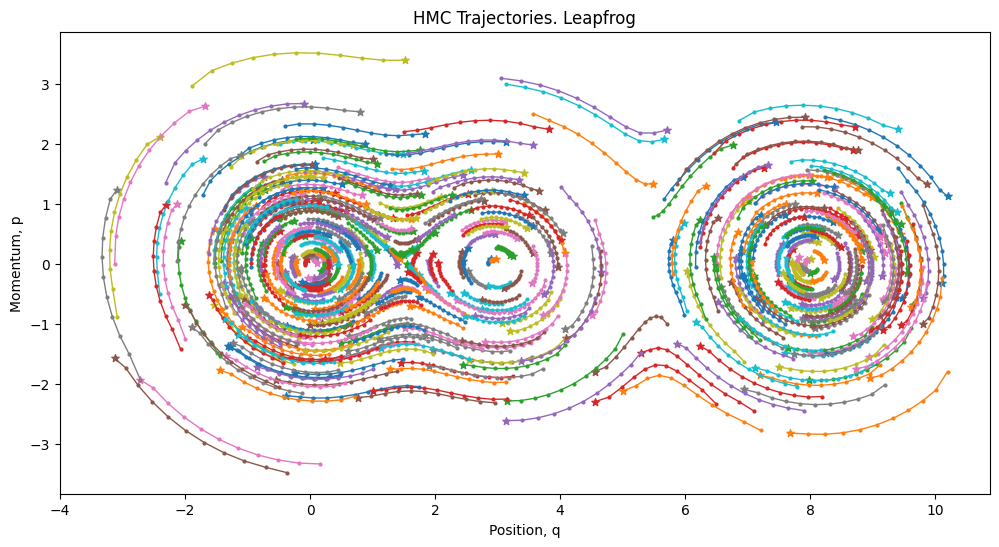

In [10]:
start_i = 1000 # start somewhere in the middle to capture all modes
max_num = 500
if not max_num or max_num > len(trace_x_all):
    max_num = len(trace_x_all)


plt.figure(figsize=(12, 6))
for trace_x, trace_v in zip(trace_x_all[start_i:start_i+max_num], trace_v_all[start_i:start_i+max_num]):
    plt.plot(trace_x, trace_v, '-o', markersize=2, linewidth=1)
    plt.scatter(trace_x[-1], trace_v[-1], s=30, marker='*')
plt.xlabel('Position, q')
plt.ylabel('Momentum, p')
plt.title('HMC Trajectories. Leapfrog')
plt.show()